<a href="https://colab.research.google.com/github/Harshithah4114/AIML_workshop/blob/main/Vehicle_routing_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg    	min    
0  	300   	584.709	466.281
1  	223   	562.868	429.252
2  	231   	558.936	429.252
3  	239   	553.697	435.286
4  	228   	552.996	429.101
5  	235   	553.448	428.117
6  	231   	550.326	415.732
7  	211   	544.172	415.732
8  	227   	537.172	418.362
9  	229   	535.234	406.871
10 	218   	526.172	380.359
11 	220   	529.836	380.359
12 	237   	526.463	380.359
13 	215   	510.373	380.359
14 	215   	494.792	380.359
15 	225   	488.611	380.359
16 	217   	474.03 	376.554
17 	215   	470.995	380.359
18 	235   	456.885	380.359
19 	235   	463.501	379.71 
20 	219   	457.775	376.554
21 	231   	458.515	376.554
22 	225   	443.421	375.905
23 	222   	438.005	375.905
24 	217   	431.842	375.905
25 	213   	424.493	375.905
26 	227   	413.59 	375.905
27 	225   	427.965	375.905
28 	236   	426.253	375.905
29 	236   	415.869	375.905
30 	232   	418.215	375.905
Best Individual: [1, 7, 5, 6, 3, 0, 4, 2, 9, 8]
Best Fitness: (375.9051851961547,)


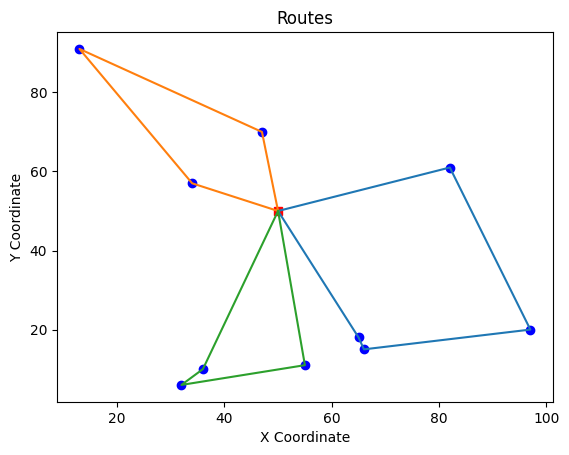

In [41]:
# Install necessary libraries at the beginning of the notebook
!pip install matplotlib deap

# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import random

# Task 2: Define the number of locations and vehicles
num_locations = 10
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)
num_vehicles = 3

# Task 3: Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Single objective (minimizing total distance)
creator.create("Individual", list, fitness=creator.FitnessMin)

# Task 4: Starting with the toolbox and tools
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function
def evalVRP(individual):
    total_distance = 0
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = sum(
            np.linalg.norm(np.array(vehicle_route[k + 1]) - np.array(vehicle_route[k]))
            for k in range(len(vehicle_route) - 1)
        )
        total_distance += vehicle_distance
    return total_distance,  # Return a tuple

toolbox.register("evaluate", evalVRP)

# Task 7: Configure the genetic operators
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)

# Plot routes
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)
    return pop, stats, hof

if __name__ == "__main__":
    population, stats, hall_of_fame = main()
    best_individual = hall_of_fame[0]
    print("Best Individual:", best_individual)
    print("Best Fitness:", evalVRP(best_individual))
    plot_routes(best_individual)